In [23]:
#importamos librerias necesarias
import rasterio
from rasterio.merge import merge
import glob
import os
from rasterio.plot import show
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt


In [10]:
#directorio de entrada y la creacion de tif
dir = os.getcwd()
directorioentrada= dir + "/imagenes/"
directoriosalida= dir + "/Output/apilado.tif"

In [11]:
#creamos un criterio de busqueda para el archivo
criteriobusqueda =  "B*.tif" 

In [12]:
#creamos una variable de criterio de busqueda llamada p
p = os.path.join(directorioentrada, criteriobusqueda)

In [13]:
print(p)

/home/jovyan/work/GitHub/BinderTester/imagenes/B*.tif


In [14]:
archivoslista  =  glob.glob(p)

In [15]:
archivoslista

['/home/jovyan/work/GitHub/BinderTester/imagenes/B3.tif',
 '/home/jovyan/work/GitHub/BinderTester/imagenes/B4.tif',
 '/home/jovyan/work/GitHub/BinderTester/imagenes/B8.tif']

In [16]:
#Creo un directorio
img_dir = dir + "/Output/resultados2/"

In [17]:
#opcional, creacion de una carpeta para el resultado de nuestra imagen, si no existe que la cree
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

In [18]:
#concatenamos para la ruta que estamos escribiendo
img_fp = img_dir + 'archivoslista.tif'

In [19]:
#leemos cada capa y la escribimos para que se apile
with rasterio.open(archivoslista[1]) as src0:
    meta = src0.meta

In [20]:
#Actualizacion de los metadato, si no se realiza no surtira efecto
meta.update(count = len(archivoslista))

In [21]:
#abrimos el directorio de imagenes, en modo escritura
with rasterio.open(img_fp, 'w', **meta) as dst:                                     
    for id, layer in enumerate(archivoslista, start=1):         # te permite recorrer una lista y decir desde donde comienza
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))                    # escribimos el archivo para que apile
            

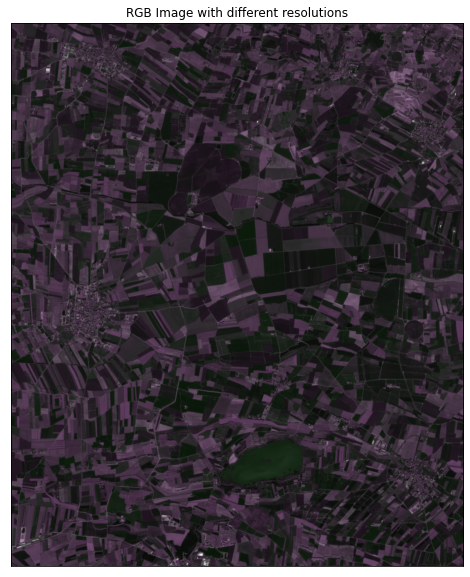

<AxesSubplot:title={'center':'blue channel'}>

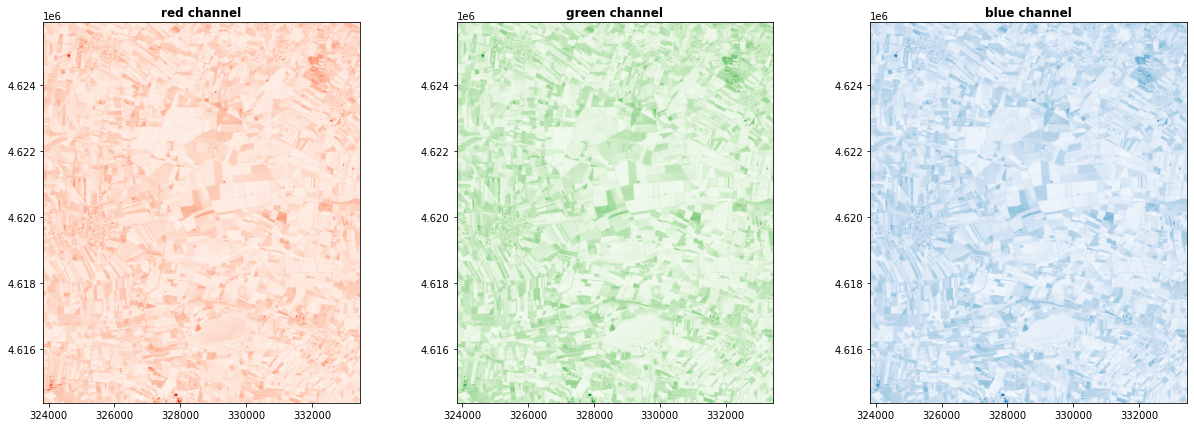

In [34]:
arr_st, meta = es.stack(archivoslista, nodata=-9999)
ep.plot_rgb(arr_st, rgb=(1, 0, 2),title="RGB Image with different resolutions")


full_data = rasterio.open(img_fp)

fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
show((full_data, 1), ax=axr, cmap='Reds', title='red channel')
show((full_data, 2), ax=axg, cmap='Greens', title='green channel') 
show((full_data, 3), ax=axb, cmap='Blues', title='blue channel')

In [35]:
#verifiquemos la geometria y el numero de bandas para asegurarnos que va todo bien                     
full_dataset = rasterio.open(img_fp)                     # abrimos el raster completo
img_rows, img_cols = full_dataset.shape                     
img_bands = full_dataset.count

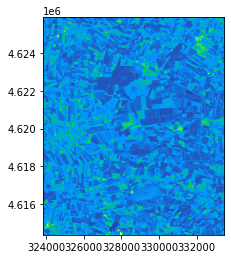

<AxesSubplot:>

In [36]:
#Mostrar
show(full_dataset, cmap='terrain')

In [37]:
#vemoslo a fondo

print(full_dataset.shape) # dimensiones, tambien ,count

(1155, 962)
